# Regresion Logistica
Hasta el momento el problema lo hemos postulado en
la ecuacion

$$\min_{\Theta} J(\Theta) = \min_{\Theta} \frac12 \| X \Theta - Y \|^2 $$
Sin embargo este es un modelo **continuo**. Es decir, por ejemplo $Y$ puede tomar cualquier valor en un intervalo $[a,b]$. Sin embargo decir que un objeto es un perro o un gato es muy distinto. Esta variable **categorica** se puede volver numerica como $1$ o $0$. Pero no mas. No hay 0.5, 0.8..

Como hacemo aca?
La variable cancer o no cancer es binaria o docotomica.

Aca vamos a necesitar **estadistica**

Comencemos con siguiente concepto. Asumamos que un programa de ML quiere pronosticar si un paciente tiene cancer o no. Tenemos que recurrir a la probabilidad condicional y escribimos. Sea $q_i$ el paciente $i$.

$$p( q_i \text{ tenga cancer} | x_i, \Theta) \ge \text{umbral} $$

Tenemos dos argumentos

1. Hasta este momento $h(\Theta)$ esta definida en el continuo.

2. Necesitamos una hipotesis $h(\Theta)$ que se pueda interpretar adecuadamente.

"naive" (ingenuo)

La forma ingenua es pensar en un modelo de regresion lineal como el sigue

$$p_{ingenua} = p_{naive}(y=1 | x, \theta_0, \theta_1) = \theta_0 + \theta_1 x $$

Que problemas tiene este modelo?

1. Que las probabilidades estan $[0,1]$ y este modelo va en el itervalo $(-\infty, \infty)$.
2. Este modelo es continuo y no sabemos como hacer que la hipotesis diago 1 o diga 0.
Descartamos este modelo "ingenuo**.

Vamos a buscar un concepto que nos ayude a interpretar el modelo **logistico**.


Para esto introducimos el concepto de **chance** (odds).
Dada un probabilidad de un evento $p$, el **chance** indica la relacion entre la probabilidad de que el evento ocurra o no ocurra.

$$ \text{chance} = \frac{p}{1 - p} \tag{1} $$
El chance es el cociente entre la probabilidad de que el evento ocurra y no ocurra.

Que problema tiene la definicion (1).

* Esta en $(0,\infty)$
* Y no tiene simetria?

Se ideo mas bien usar el logaritmo del chance.
Veamos

$$\log \frac{p}{1 - p} $$
Si $p=1/2$, $\log p/(1-p)=0$.  Muestra neutralidad.

Veamos la **simetria**
















$$\log \frac{p}{1 - p} = \log p - \log(1-p) = -[ \log(1-p) - \log p ] = - \log \frac{1-p}{p} $$

Se penso en un modelo un poco mas inteligente:


$$\log \frac{p}{1-p} = \theta_0 + \theta_1 x $$
A este modelo se le llama **logistic regression**

Referencia:

[40] S.W. Menard. Logistic Regression: From introductory to advanced concepts and applica-
tions. Sage Research Methods. SAGE, 2010.

Asuma que el termino de la derecha lo llamos $y$
y tenemos

$$\log \frac{p}{1-p} = y$$

Vamos a encontrar $p$ como funcion de $y$ (despejar)?



\begin{eqnarray}
\end{eqnarray}

\begin{eqnarray}
\log \frac{p}{1-p} &=& y \\
\frac{p}{1-p} &=& \mathrm{e}^y \\
p &=& (1 - p) \mathrm{e}^y \\
p + p \mathrm{e}^y &=& \mathrm{e}^y \\
p(1 + \mathrm{e}^{y}) &=& \mathrm{e}^y \\
p &=& \frac{\mathrm{e}^y}{1 + \mathrm{e^y}} \\
p &=& \frac{1}{1 + \mathrm{e}^{-y}}
\end{eqnarray}
Recuerde que $y=X \theta = (1 , x) \cdot (\theta_0, \theta_1) = \theta_0 + \theta_1 x$

Encontramos

$$p = \frac{1}{1 + \mathrm{e}^{-X \theta}} $$

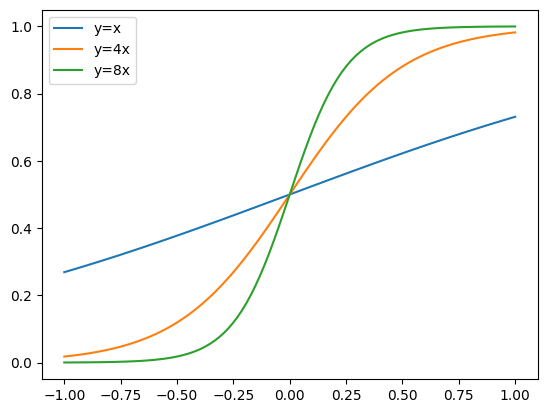

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def S(y):
    return 1 / (1 + np.exp(-y))

x = np.linspace(-1, 1, 100)
y1 = S(x)
y4 = S(4*x)
y8 = S(8*x)
plt.plot(x, y1)
plt.plot(x, y4)
plt.plot(x, y8)
plt.legend(['y=x', 'y=4x', 'y=8x'])
plt.show()

Esta funcion tiene un nombre **logistic function** (sigmoid por que es como una $s$.

El objetivo de esta clase es:

1. Explorar y eliminar posibilidades la **funcion de costo** $J(\theta)$ para la regresion logistica.




## Notas acerca de la funcion logistica.

La funcion logistica tiene dos representaciones de la derivada interesantes.

$$S(t) = \frac{1}{1 + \mathrm{e^{-t}}}$$

1. $$S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \mathrm{e}^{-t} S^2(t) \tag{2} $$

2.
$$S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2}  = \frac{1}{1 + \mathrm{e}^{-t}}  \frac{\mathrm{e}^{-t}}{1 + \mathrm{e}^{-t}} = \frac{1}{1 + \mathrm{e}^{-t}} \left (  1 - \frac{1}{1 + \mathrm{e}^{-t}}  \right ) = S(t) (1 - S(t)) \tag{3} $$

Volviendo a la regresion lineal. Pensemos en las etiquetas $Y=(y_i)$, pero $y_i=1$ o $y_i=0$.

El problema desde el punto de vista de regresion lineal es

$$ X \Theta  = Y \quad , \quad X \in \mathrm{R}^{m \times n} \quad , \quad Y \in \mathbb{R}^{m \times 1} $$

Observamos que $X \Theta$ es un vector de components
$-\infty <  x^{(i)}  \Theta < \infty$, pero que la funcion logistica $S$ las **comprime** (squeeze)
entre 0 y 1. Definimos la **hipotesis logistica** como

$$h(\Theta, x^{(i)}) = S( x^{(i)} \Theta) = \frac{1}{1 + \mathrm{e}^{-(x^{(i)})^T \Theta}} \tag{4} $$




Aun asi no estoy satisfecho.
* Por el lado bueno ya tenemos una hipotesis que esta en el intervalo $[0,1]$ y que representa una probabilidad.
* Pero es continua. Todavia no nos satisface que defina un perro de un gato.


Asumamos que las posibilidades de $Y^{(i)}$ sean $0$
o $1$.
Por decir

$$p( Y^{(i)} = 0 | x^{(i)}, \Theta) = 1 - p( Y^{(i)} = 1 | x^{(i)} , \Theta)  $$
Vamos a definir un umbral $\gamma$ (por ejemplo 0.5).
Podemos definir una hipotesis **binaria** como sigue

\begin{eqnarray}
h_{binaria}(\Theta, x^{(i)}) =
\left \{
    \begin{array}{cc}
    1  & \text{si } S( x^{(i)} \Theta) > \gamma \\
    0  & \text{de otra forma}
    \end{array}
    \right .
\end{eqnarray}




## Funcion de costo de la regresion logistica.
Volviendo al caso de la regresion lineal, la funcion de costo era

$$J(\theta) = \frac12 \| h(\theta, X) - Y \|^2 = \frac12 \sum_{i=1}^m \| h_i(\theta, X) - Y_i \|^2 $$
A veces, en vez de $1/2$ se usa $1/2m$. Pero eso cambia la posicion del minimo? **no** (tarea)







Podriamos pensar en la funcion de costo igual, pero con la hipotesis definida en la ecuacion (4). Pero
hay un problema.

En lo posible, para funciones de costo, quisieramos que fueran **convexas**.

El problema es que este $J$ con la hipotesis (4) no es convexa.  En calculo (diferencial) se prueba que las funciones convexas tiene segunda derivada positiva.
Pero si definimos la funcion de costo como $J$ arriba y la hipotesis 4 no seria convexa.

Probamos esto con contrajemplo.

Definamos la funcion de costo como minimos cuadrados con un solo punto de valor 1

$$J(\theta) = \frac12 ( S(1 + \theta) - 1)^2 $$

Con solo un termino mostramos que la funcion no es convexa.

Usamos la forma 3
$$S'(t) = \mathrm{e}^{-t} S^2(t)  $$
$$\frac{ d J(\theta)}{ d \theta} = (S(1+\theta_1) - 1)S^2(1 + \theta) \mathrm{e}^{-1 - \theta} =  -\mathrm{e}^{-1 - \theta} S^2 (1 + \theta) + S^3(1 + \theta) \mathrm{e}^{-1 - \theta}  $$


$$\frac{d^2 J(\theta)}{d \theta} = \mathrm{e}^{-1 - \theta} S^2(1 + \theta) - 2 S^3(1 + \theta) \mathrm{e}^{-2 - 2 \theta} + 3 S^4(1 + \theta) \mathrm{e}^{-2 - \theta} -S^3(1 + \theta) \mathrm{e}^{-1 - \theta}  $$

Factorizamos

$$\frac{d^2 J(\theta)}{d \theta} =\mathrm{e}^{-1 - \theta} S^2(1 + \theta) [ 1 - 2 S(1 + \theta) \mathrm{e}^{-1 - \theta} + 3S^2(1 + \theta) \mathrm{e}^{-1 - \theta} - S(1 + \theta)) $$

La pregunta es si esta segunda derivada es  positiva o negativa?

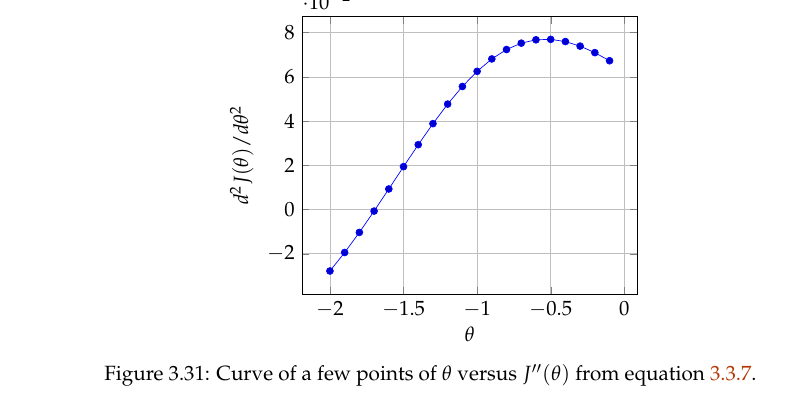

Tiene puntos de valores positivos y otros negativos. O sea que no es ni concava (si lo fuera se puede multiplicar por -1 y convertial en covexa) ni es convexa.

De forma que esta funcion de costo se descarta.

En conclusion de la clase de hoy:

1. Exploramos hipotesis y encontramos una adecuada. La logistic function $h(X, \theta)= S(x^T \theta)$.

2. Exploramos funciones de costo y buscando la que mas se acerca a la regresion lineal la descartamos por que no es convexa.

# Proxima clase:
1. Buscar la funcion de costo que sea **convexa**.
2. Encontrar el gradiente de la funcion de costo.

